<a href="https://colab.research.google.com/github/iamanolive/iiit-allahabad-courses/blob/main/machine-learning/6-classification-models/2-model-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np

In [72]:
import matplotlib.pyplot as plt

## gathering the data

In [73]:
data = pd.read_csv("heart_disease_uci.csv")

In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
y = data.target.values
x_data = data.drop(["target"], axis = 1)

## normalizing the data

In [76]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

## preparing the data

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
log = LogisticRegression()
log.fit(x_train, y_train) # training model

LogisticRegression()

In [81]:
print("Test accuracy of Logistic regression: {}".format(log.score(x_test, y_test) * 100))

Test accuracy of Logistic regression: 62.295081967213115


## k-nearest neighbor

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
prediction = knn.predict(x_test)
print("Test accuracy of KNN: {}".format(knn.score(x_test, y_test) * 100))

Test accuracy of KNN: 67.21311475409836


In [94]:
score_list = []

In [86]:
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_test)
  score_list.append(knn.score(x_test, y_test))

Text(0, 0.5, 'Score')

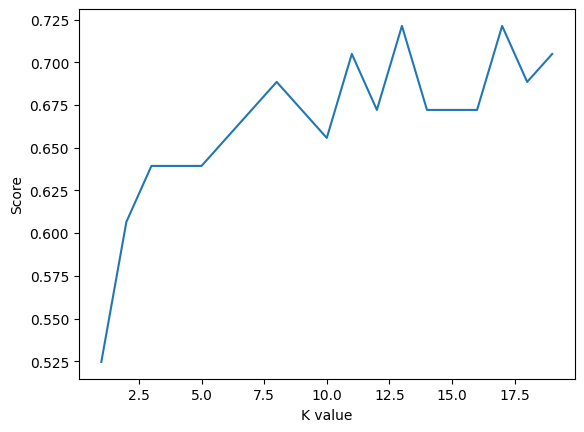

In [87]:
plt.plot(range(1, 20), score_list)
plt.xlabel("K value")
plt.ylabel("Score")

In [88]:
score_list

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853]

In [91]:
print("Test accuracy of KNN: {}".format(np.max(score_list) * 100))

Test accuracy of KNN: 72.1311475409836


## support vector machine

In [95]:
from sklearn.svm import SVC

In [96]:
svm = SVC(random_state = 1)

In [97]:
svm.fit(x_train, y_train)

SVC(random_state=1)

In [98]:
print("Test accuracy of SVM: {}".format(svm.score(x_test, y_test) * 100))

Test accuracy of SVM: 68.85245901639344


## naive bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
nb = GaussianNB()

In [101]:
nb.fit(x_train, y_train)

GaussianNB()

In [103]:
print("Test accuracy of Naive Bayes: {}".format(nb.score(x_test, y_test) * 100))

Test accuracy of Naive Bayes: 85.24590163934425


## decision tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtc = DecisionTreeClassifier()

In [106]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
print("Test accuracy of DTC: {}".format(dtc.score(x_test, y_test) * 100))

Test accuracy of DTC: 77.04918032786885


## random forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [110]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [111]:
print("Test accuracy of RF: {}".format(rf.score(x_test, y_test) * 100))

Test accuracy of RF: 85.24590163934425


## comparing values

In [116]:
methods = [
    "logistic regression",
    "KNN",
    "SVM",
    "Naive Bayes",
    "Decision Tree",
    "Random Forest"
]

In [117]:
accuracy = [
    log.score(x_test, y_test) * 100,
    knn.score(x_test, y_test) * 100,
    svm.score(x_test, y_test) * 100,
    nb.score(x_test, y_test) * 100,
    dtc.score(x_test, y_test) * 100,
    rf.score(x_test, y_test) * 100
]

In [118]:
colors = [
    "purple",
    "green",
    "orange",
    "magenta",
    "#CFC60E",
    "#0FBBAE"
]

In [119]:
import seaborn as sb

<ipython-input-122-cd1e08418ea1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = methods, y = accuracy, palette = colors)


<Axes: xlabel='Algorithms', ylabel='Accuracy (%)'>

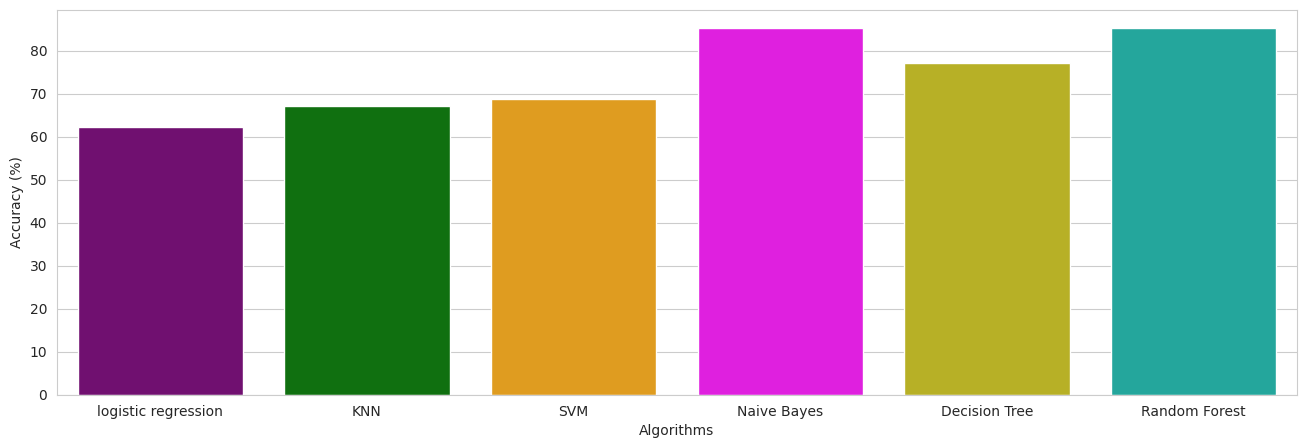

In [122]:
sb.set_style("whitegrid")
plt.figure(figsize = (16, 5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
sb.barplot(x = methods, y = accuracy, palette = colors)